# 1. 1. 1 벡터와 행렬

In [1]:
import numpy as np

x = np.array([1, 2, 3])

print(x. __class__)

print(x.shape)

print(x.ndim)

W = np.array([[1,2,3],[4,5,6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


# 1. 1. 2 행렬의 원소별 연산

In [2]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0, 1, 2],[3, 4, 5]])

print(W + X)
print(W*X) # 아다마르 곱

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


# 1. 1. 3 브로드캐스트

In [3]:
A = np.array([[1,2], [3,4]])
print(A * 10)

[[10 20]
 [30 40]]


In [4]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
print(A*b) # 차원이 달라도 차원을 확장하고 계산을 해줌 -> 브로드

[[10 40]
 [30 80]]


# 1. 1. 4 벡터의 내적과 행렬의 

In [5]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(np.matmul(A,B))

32
[[19 22]
 [43 50]]


# 1. 2. 1 신경망 추론 전체 그림

In [6]:
import numpy as np

W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)
h = np.matmul(x, W1) + b1
print(h)

[[-0.54224681  0.88320552 -1.418203   -0.48489581]
 [-2.23856273  0.07269985 -3.46282597  1.48265467]
 [-2.3211737   1.87388102 -1.94955819  0.72428039]
 [ 0.25643704  1.15253938 -0.55390774 -1.35918025]
 [ 0.21347787  1.74348277 -0.06989792 -1.59311755]
 [ 2.02886538 -0.78088973 -0.85373679 -2.12475476]
 [-2.78897191  0.06861341 -3.89939383  2.00092368]
 [-1.6058005   1.10218523 -2.06298526  0.41126688]
 [-1.60243548  2.27865186 -1.02947892 -0.13785458]
 [-1.61614229  1.7616405  -1.49328412  0.11493481]]


In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
a = sigmoid(h)
print(a)

[[0.36766507 0.70748604 0.19494345 0.38109672]
 [0.0963406  0.51816696 0.03038865 0.81497322]
 [0.08938448 0.86690671 0.12460154 0.67354889]
 [0.56376024 0.75997444 0.36495826 0.20437357]
 [0.5531677  0.8511289  0.48253263 0.16894573]
 [0.8837946  0.31412816 0.29864957 0.10671397]
 [0.05792303 0.51714662 0.0198521  0.88089402]
 [0.16717248 0.75066933 0.11274685 0.60139161]
 [0.1676415  0.90709349 0.26318514 0.46559083]
 [0.16573758 0.853415   0.18342931 0.52870211]]


In [9]:
import numpy as np

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2
print(s)

[[-1.39504474  1.16988231 -0.4792553 ]
 [-1.29037429  1.2146658  -0.61659877]
 [-1.47758601  1.72848021 -1.00436535]
 [-1.19526673  0.76183424  0.00721911]
 [-1.32549459  1.57498279 -0.96542065]
 [-1.34341015  1.48468618 -0.88256028]
 [-0.67047711  0.55506436  0.08001119]
 [-1.21656698  1.14873956 -0.5858221 ]
 [-0.57533549  0.6111685  -0.12817211]
 [-0.79277972  0.63166242 -0.02505759]]


# 1. 2. 2 계층으로 클래스화 및 순전파 구현

In [10]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward (self, x):
        return 1/(1 + np.exp(-x))

In [11]:
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]

    def forward(self,x):
        W, b = self.params
        out = np.matmul(x,W) + b
        return out

In [12]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size


        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)

        ]


        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [13]:
a = ['A', 'B']

a +=['C', 'D']

print(a) 

['A', 'B', 'C', 'D']


In [14]:
x = np.random.randn(10,2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

# 1. 3. 4 계산 그래프

In [15]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis = 0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims = True)


In [ ]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis = 0, keepdims = True)

dy = np.random.randn(1,D)
dx = np.repeat(dy, N, axis = 0)

In [16]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout,W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

# 1. 3. 5 기울기 도출과 역전파 구현

In [ ]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.oout = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backwward(self, dout):
        dx = dout * (1.0 - self.dout) * self.out
        return dx


In [17]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

# 1. 3. 6 가중치 갱신

In [ ]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr *grads[i]

# 1. 4. 1 스파이럴 데이터

In [18]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
%cd /content/drive/MyDrive/Colab Notebooks

from dataset import spiral

/content/drive/MyDrive/Colab Notebooks


x (300, 2)
t (300, 3)


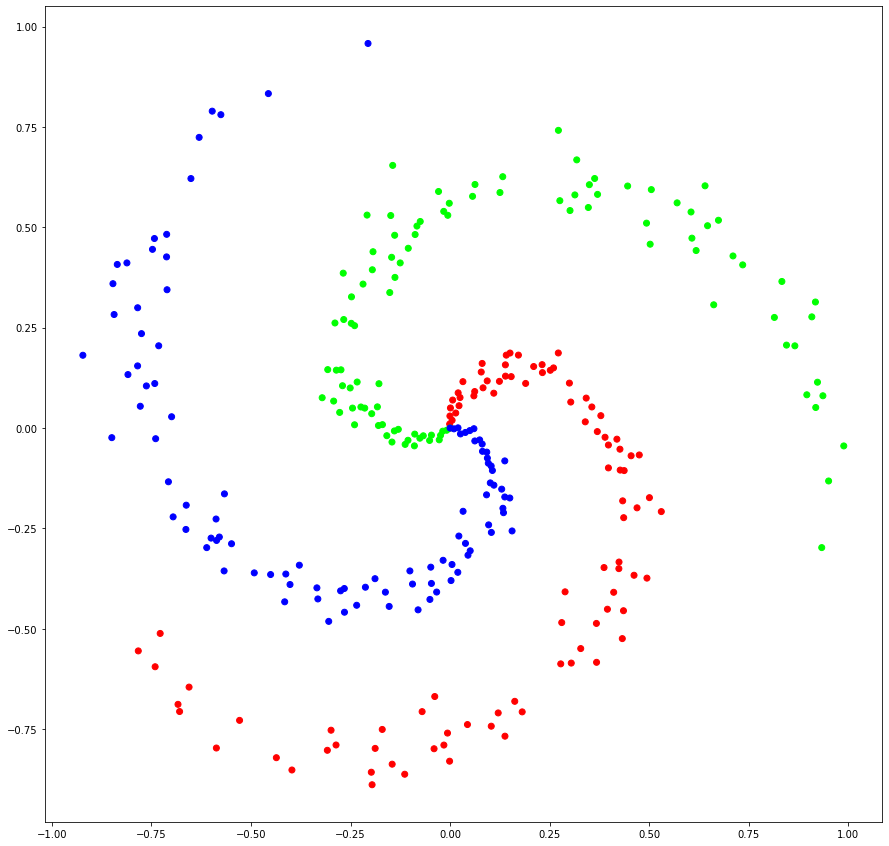

In [33]:
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

plt.figure(figsize = (15, 15))
plt.scatter(x[:,0], x[:,1], c = t)

In [ ]:
import numpy as np
from common. layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)


        self.layers = [
        Affine(W1, b1),
        Sigmoid(),
        Affine(W2, b2)
        ]

        self.loss_layer = SoftmaxWithLoss()
        self.params, self,grads = [], []

        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout